# Домашняя работа

## Easy

Для данных с Титаника обучить модели логистической регресси на 80% обучающей выборки и проверить результат на 20%. Вывести accuracy. 

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./../hw_data/titanic/train.csv')
dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [3]:
df  = pd.get_dummies(dataset, columns = ['Sex','Pclass','Embarked'])
df.drop('Sex_female', axis=1, inplace=True)
df = df.dropna()

y_df = df['Survived']
df.drop('Survived', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [4]:
df.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
1,2,38.0,1,0,71.2833,0,1,0,0,1,0,0
3,4,35.0,1,0,53.1000,0,1,0,0,0,0,1
6,7,54.0,0,0,51.8625,1,1,0,0,0,0,1
10,11,4.0,1,1,16.7000,0,0,0,1,0,0,1
11,12,58.0,0,0,26.5500,0,1,0,0,0,0,1


In [5]:
train_x, test_x, train_y, test_y = train_test_split(df, y_df, train_size=0.8)

In [6]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_x, train_y)
pred_y = lr_model.predict(test_x)
accuracy_score(test_y, pred_y)

0.8918918918918919

## Normal

Для датасета Boston сделать лучшую линейную модель, которую можно легко интерпретировать. Сделать выводы о данных на основе вашей линейной регрессии.

In [10]:
from sklearn.datasets import load_boston
data = load_boston()
x_df = pd.DataFrame(data['data'], columns=data['feature_names'])
print(x_df.head(1))
y_df = pd.DataFrame(data['target'], columns=['y'])
print(y_df.head(1))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.09  1.0  296.0     15.3   

       B  LSTAT  
0  396.9   4.98  
      y
0  24.0


In [12]:
full_df = pd.concat([x_df, y_df], axis=1)
full_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Исходя из коэффициентов корреляции можно предположить, что есть зависимость цены от числа комнат RM, процента нижних классов проживающих в районе LSTAT.

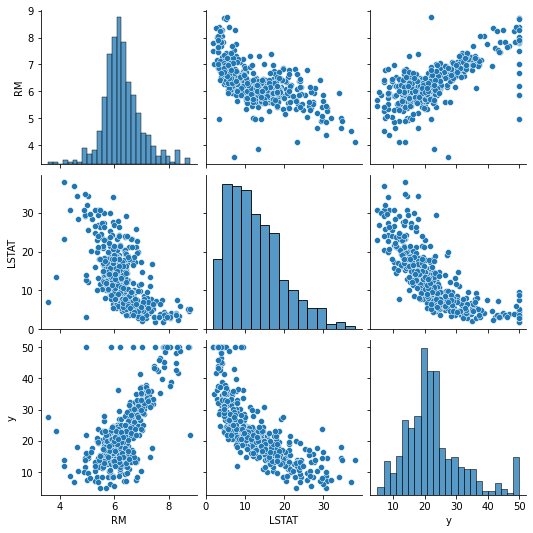

In [13]:
sns.pairplot(full_df[['RM', 'LSTAT', 'y']])

По графикам видно, что зависимость от RM близка к линейной, а от LSTAT имеет нелинейную характеристику. Добавим синтетическую колонку LSTAT^2 для отражения нелинейности.

In [16]:
x_df['LSTAT2'] = x_df['LSTAT'] ** 2

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8)

In [22]:
model = LinearRegression()
model.fit(x_train[['LSTAT','LSTAT2','RM']], y_train)
y_pred = model.predict(x_test[['LSTAT','LSTAT2','RM']])
print(np.sqrt(mean_squared_error(y_pred, y_test)))

4.834756345386016


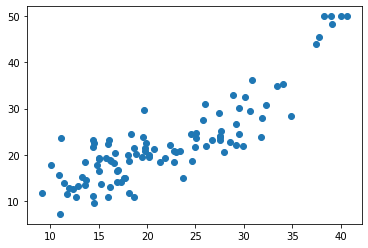

In [23]:
plt.scatter(y_pred, y_test)

## Hard

Чтобы окончательно разобраться с линейной регрессией, лучше всего один раз реализовать ее самостоятельно. В этом и состоит суть задания.

В качестве данных использовать датасет https://www.kaggle.com/mustafaali96/weight-height. Единицы измерения - дюймы и фунты.

Будем исследовать как рост зависит от веса для мужчин.

Алгоритм решения задачи:

1. Написать функцию для подсчета прогноза линейной регрессии $f(w, b, x) = wx + b$, в которой w и b - веса модели, которые мы будем оптимизировать, а x - входные данные (зависимая переменная). Обращаю внимание, что функция должна быть векторизована, то есть в x должна быть возможность передать вектор значений, а не одно число.

2. Написать функцию ошибки для модели $J(w, b, x)$. $w$, $b$ - параметры модели, а $x$ - вектор входящих данных. В качестве ошибки будем использовать [Mean Squared Error (MSE)](http://statistica.ru/glossary/general/srednekvadraticheskaya-oshibka/).

3. Минимизировать функцию J по параметрам $w$ и $b$, используя данные $x$. Минимизацию можно проводить при помощи функции minimize.

4. Подставить получившиеся минимальные значения w и b в функцию f, нарисовать диаграмму рассеивания (scatter plot) и отобразить работу модели (пример графика есть в этом ноутбуке)